In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import numpy as np

In [82]:
data = pd.read_csv("../knn/test", names=["gender", "height", "weight"])

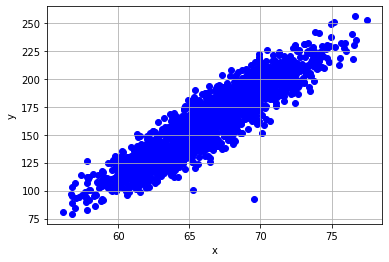

In [83]:
%matplotlib inline 
plt.scatter(data['height'], data['weight'], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [84]:
def get_regression_line(data, x, y):
#     mean_y = (sum(data['weight'])/len(data['weight']))
#     mean_x =  (sum(data['height'])/len(data['height']))
    
    mean_x =  (sum(x)/len(x))
    mean_y =  (sum(y)/len(y))

    m = 0
    b = 0
    top = 0
    bottom = 0
    for index, row in data.iterrows():
        current_x = row['height']
        current_y = row['weight']
        top += ((current_x-mean_y)*(current_y-mean_y))
        bottom += (current_x - mean_x) ** 2
    m = top/bottom
    b = mean_y-(m*mean_x)
    return m, b, mean_x, mean_y

In [85]:
small_data = data.head(100)
x = small_data['height']
y = small_data['weight']

In [86]:
m, b, mean_x, mean_y = get_regression_line(small_data, x, y)

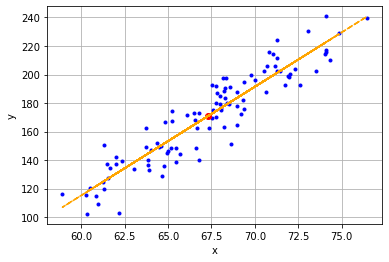

In [87]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, b + m * x, '--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

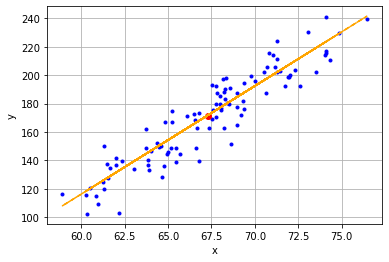

In [88]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, b+1 + m * x, '--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

In [89]:
m

7.615096323553024

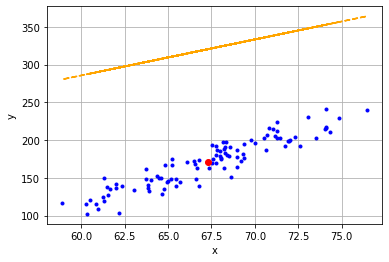

In [90]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, 4.76 * x, '--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

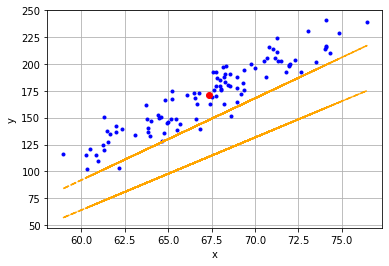

In [91]:
%matplotlib inline 
plt.plot(x, y, '.', color='b')
plt.plot(mean_x, mean_y, color='r', marker='o' )
plt.plot(x, b + 6.76 * x ,'--', color='orange')
plt.plot(x, -365 + 7.61509 * x ,'--', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show();

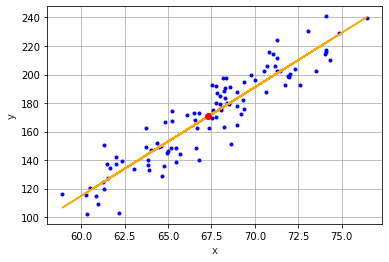

In [92]:
y_g = 7.61509*x+(-342)
plt.plot(x, y, '.', color='b')
plt.plot(x, y_g, 'orange', label='y=2x+1')
plt.plot(mean_x, mean_y, color='r', marker='o' )
# plt.title('Graph of y=2x+1')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
# plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Use these functions to get the points to graph the sum of the error as y and m or b as x

In [93]:
def sse_m(data, m):
    """
    """
    x = list(data['height'])
    errors = []
    sum_error = 0
    for i in range(len(x)):
        predicted = m*x[i]
        errors.append(predicted)
    data['predicted'] = errors
    data["sq_errors"] = (data["predicted"] - data['weight'])**2
    sum_error = sum(data["sq_errors"])
    
    return m, sum_error

In [148]:
def sse_b(data, b):
    """
    """
    x = list(data['height'])
    errors = []
#     sum_error = 0
    for i in range(len(x)):
        predicted = 1*x[i]+b
        errors.append(predicted) 
    data['predicted'] = errors
    data["sq_errors"] = (data["predicted"] - data['weight'])**2
    sse = sum(data["sq_errors"])
    return sse


### Some math

###  $ sse = \sum_{i=1}^n (y'-y)^2 = \sum_{i=1}^n (mx+b - y)^2$





$\frac{d}{dm} = (mx+b - y)^2 = \frac{d}{dm}[(mx+b -y)^2] =  2(mx+b - y)*\frac{d}{dm}[(mx+b-y)] = 2(mx+b -y)*x = 2(y'-y)x$

$\frac{d}{db} = (mx+b - y)^2 =  \frac{d}{db}[(mx+b-y)^2] = 2(mx+b-y)*\frac{d}{db}[(mx+b-y)]=2(mx+b-y)*1=2(y'-y)$ 

In [95]:
def graph_line(data, m, b):
    x = data['height']
    y = m*(x)+b
    lab = f'{m}*x+{b}'
    %matplotlib inline 
    plt.plot(x, data['weight'], '.', color='b')
    plt.plot(x, y, '-', color='orange', label=lab)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show();

In [96]:
def get_derivative(data, m):
    return 2 * ( sum( (m * data["height"] - data["weight"]) * data["height"]) )

In [142]:
def get_derivative_b(data, b, m=1):
    return 2 * ( sum( ((m * data["height"] + b) - data["weight"]) ))

In [152]:
def gradient_descent_wtih_b(data, m, b, l_rate):
    y = list(data['weight'])
    x = list(data['height'])
    for i in range(len(x)):
        current_y = int(y[i])
        current_x = int(x[i])
        guess = int(b+m*current_x)
        error = (current_y - guess)
        step_b = 2*(error*1)*l_rate 
        b += step_b
        graph_line(data, m, b)

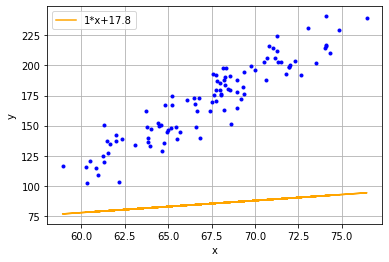

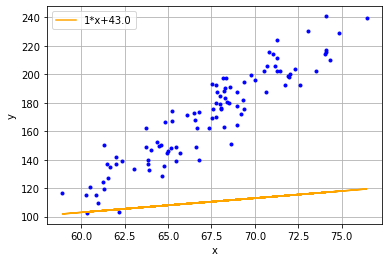

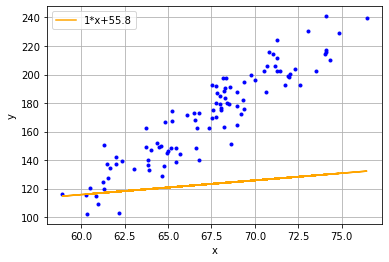

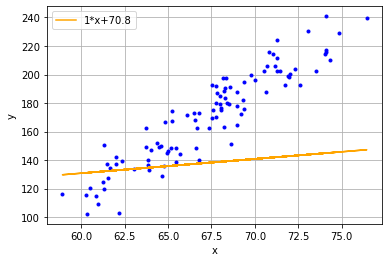

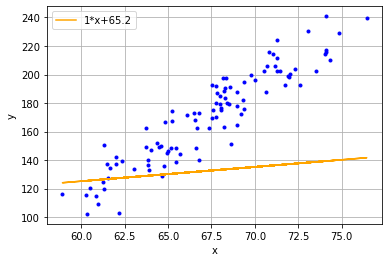

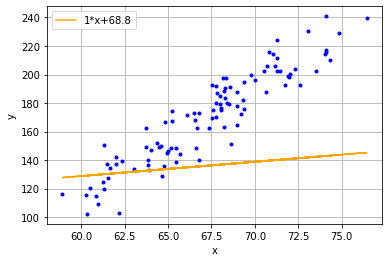

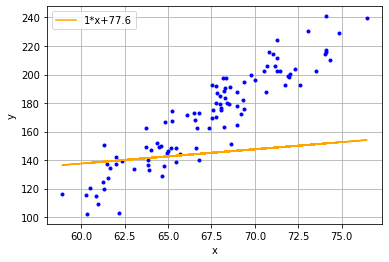

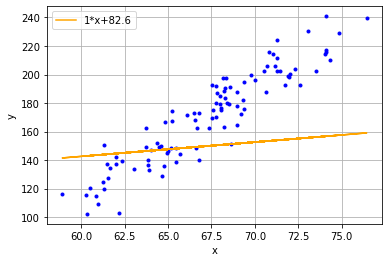

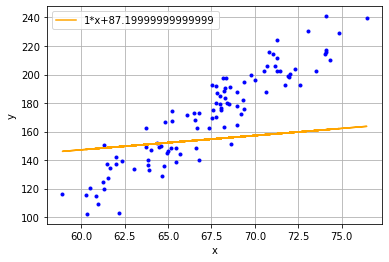

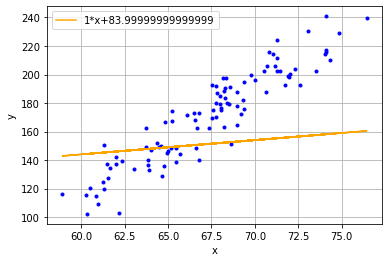

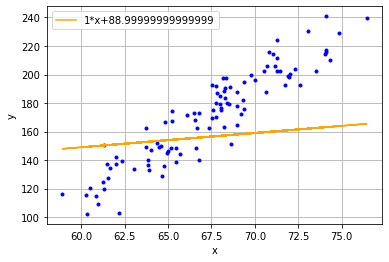

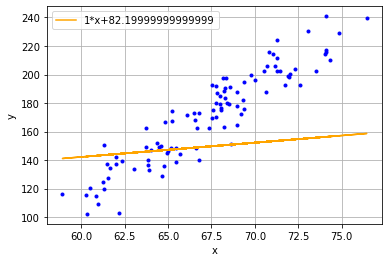

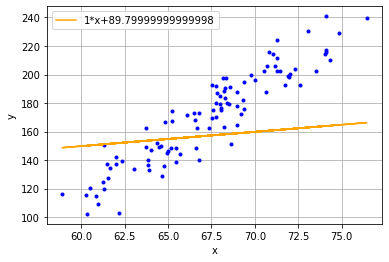

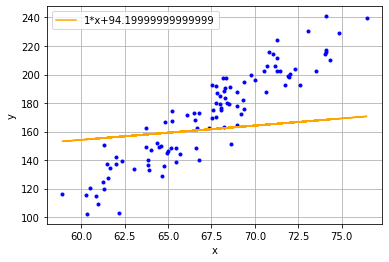

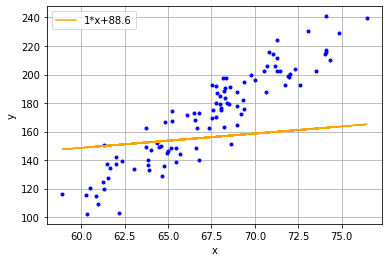

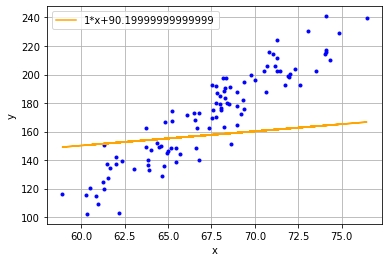

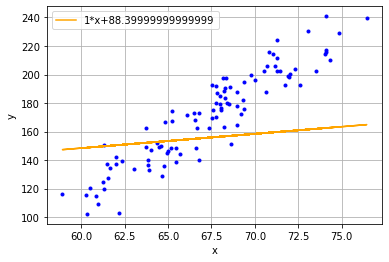

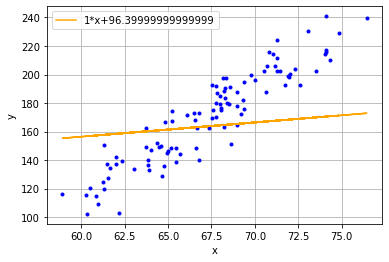

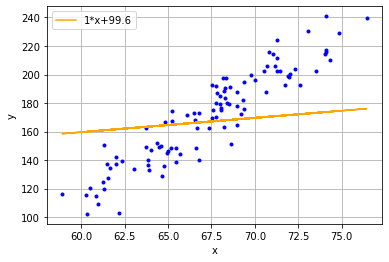

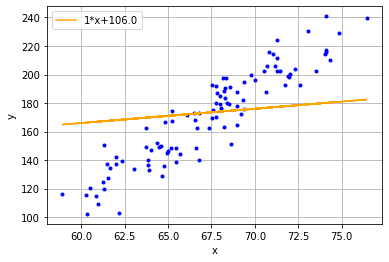

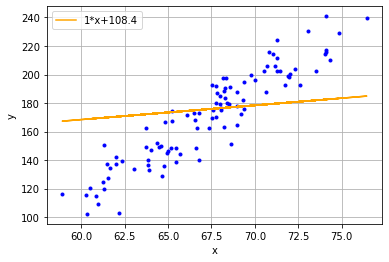

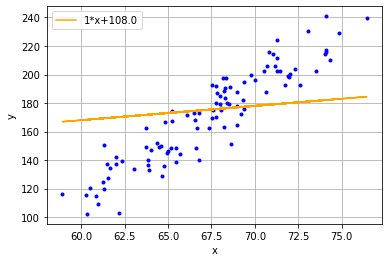

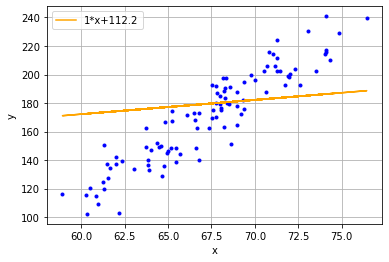

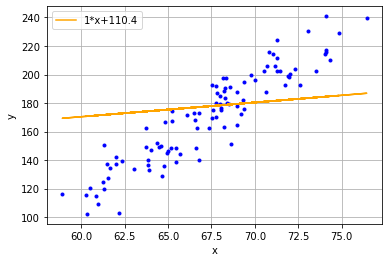

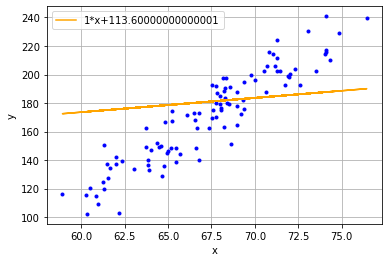

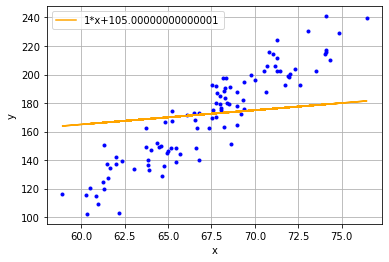

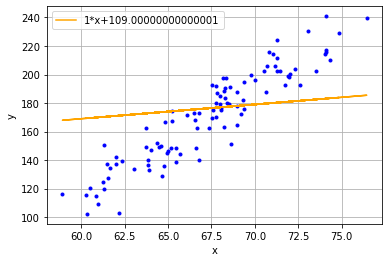

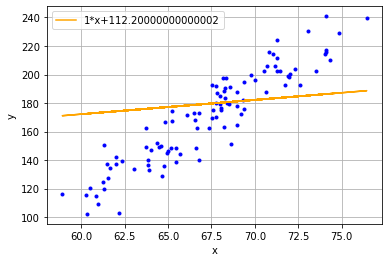

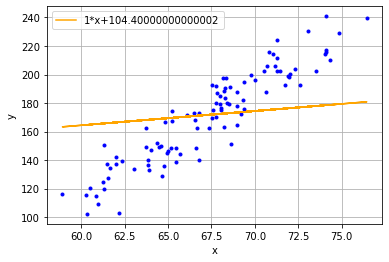

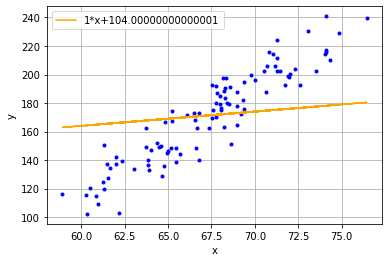

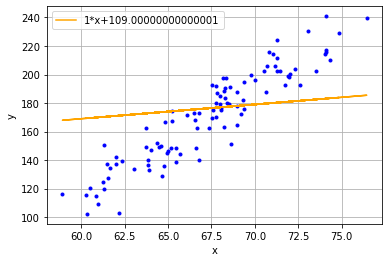

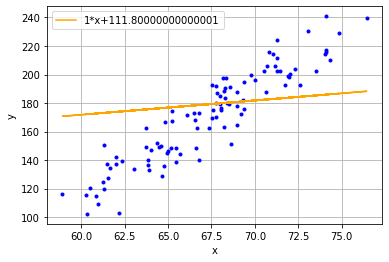

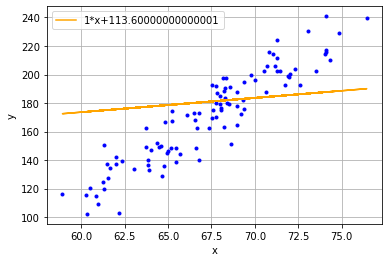

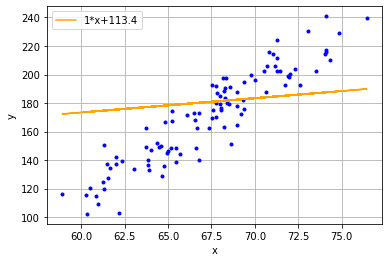

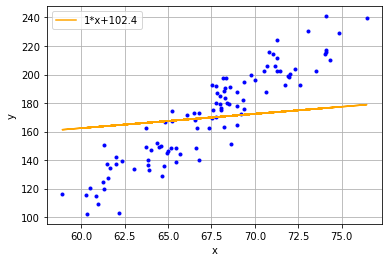

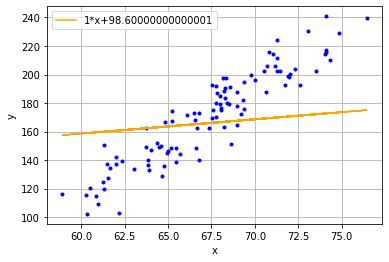

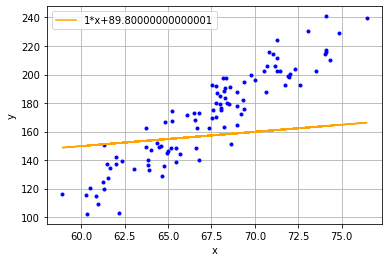

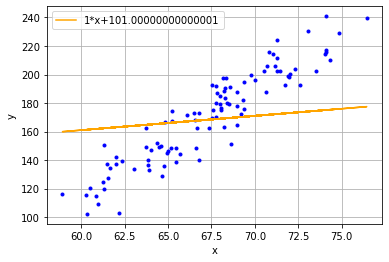

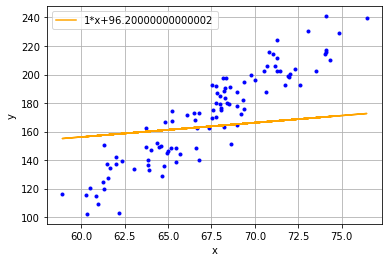

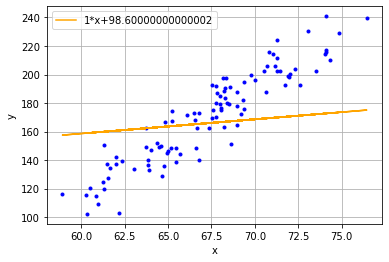

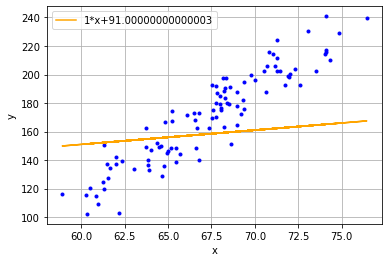

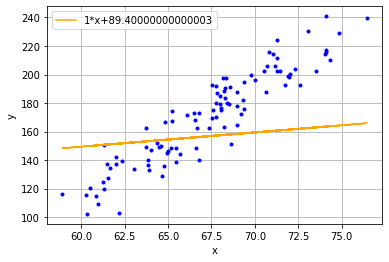

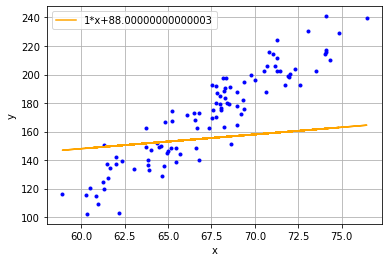

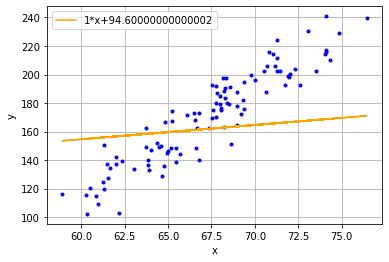

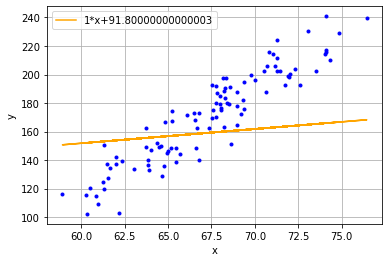

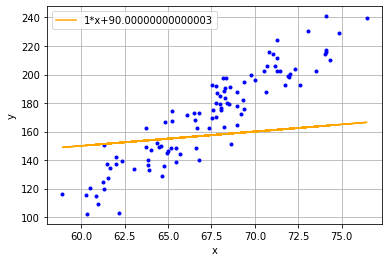

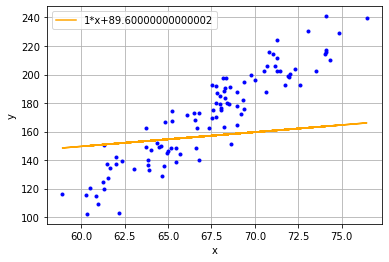

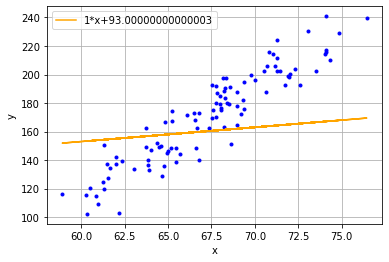

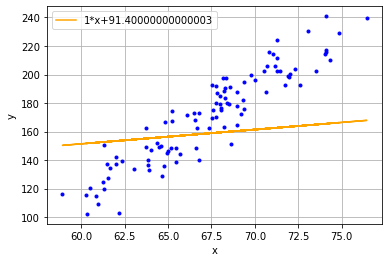

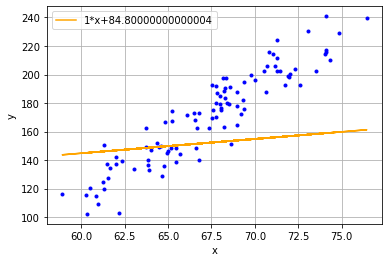

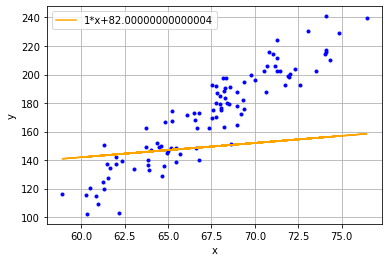

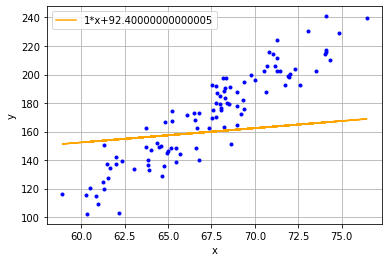

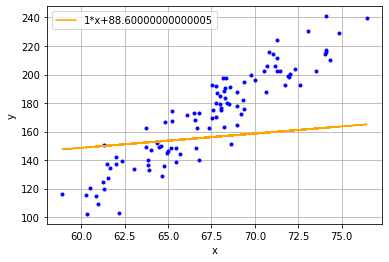

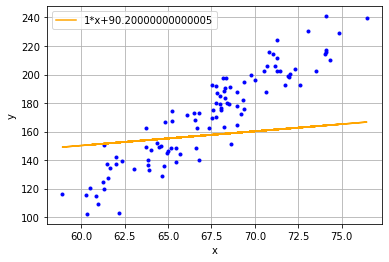

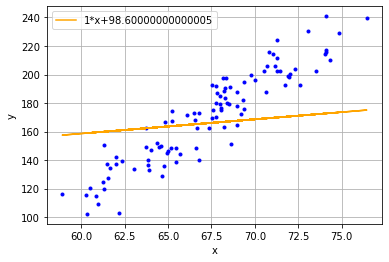

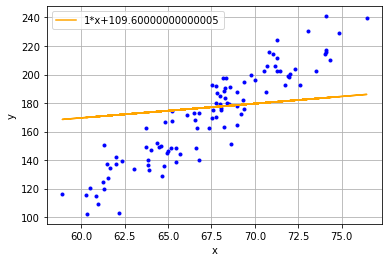

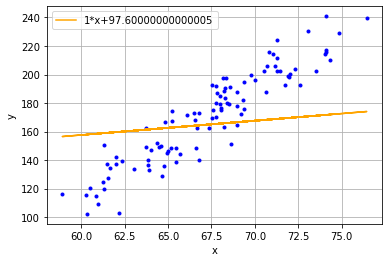

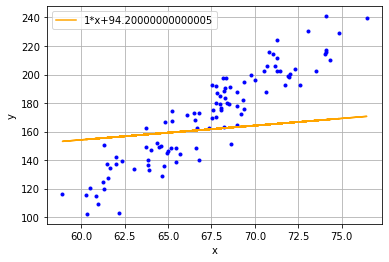

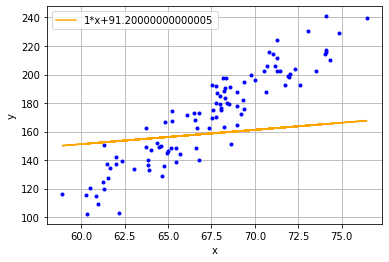

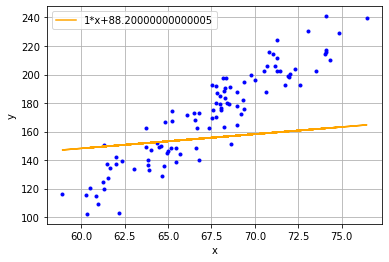

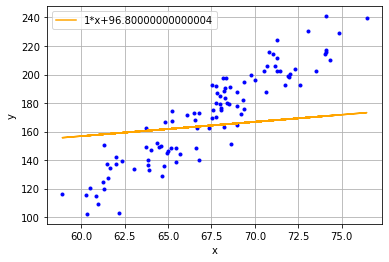

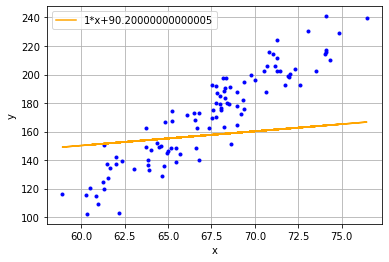

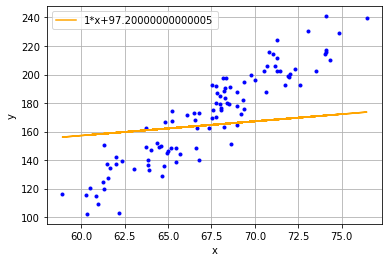

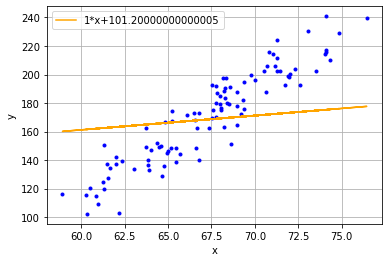

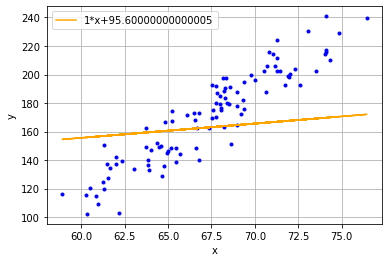

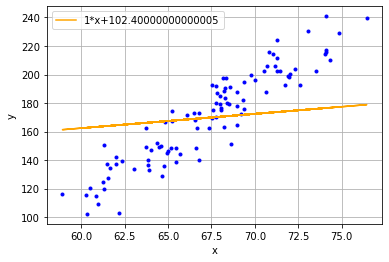

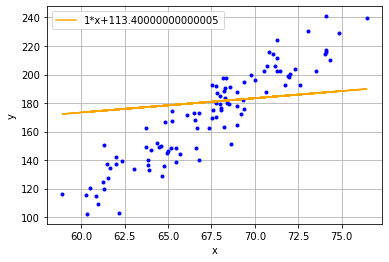

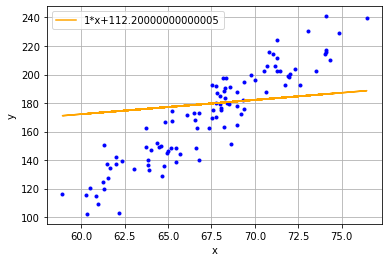

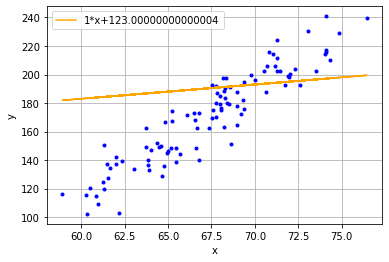

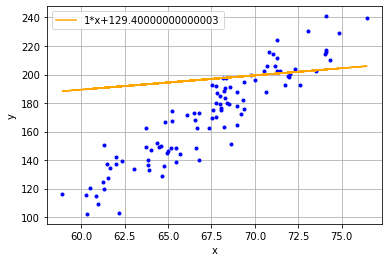

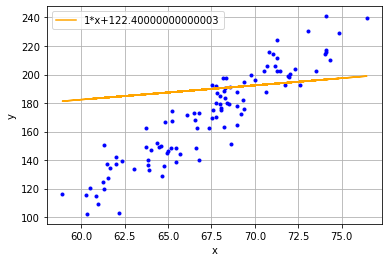

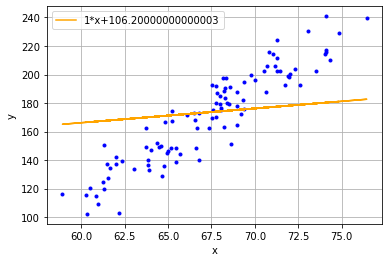

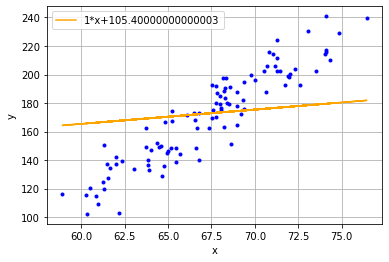

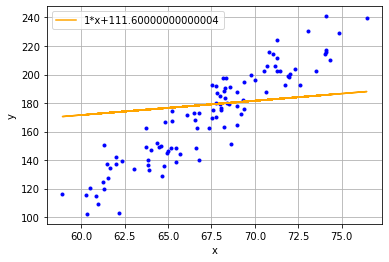

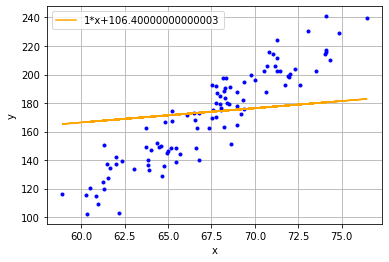

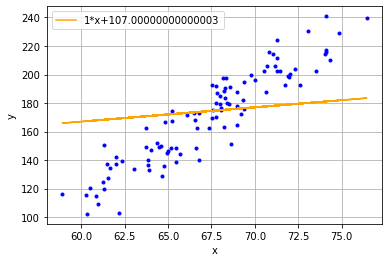

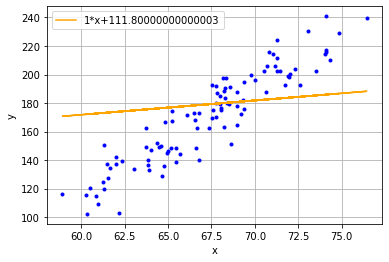

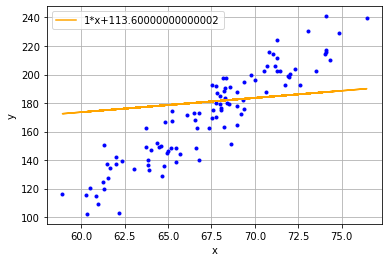

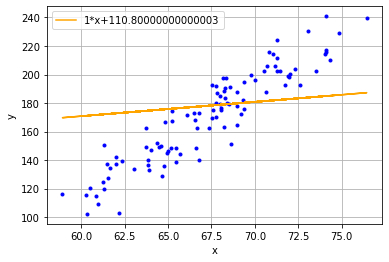

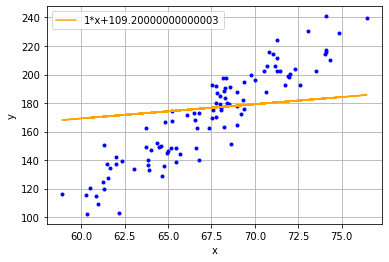

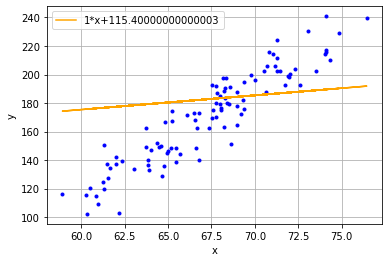

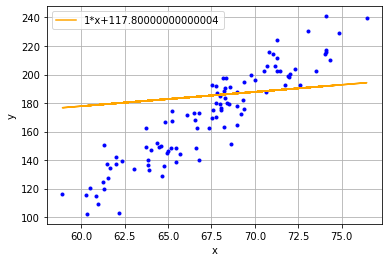

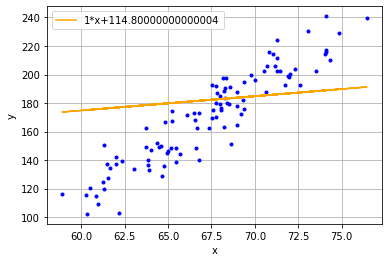

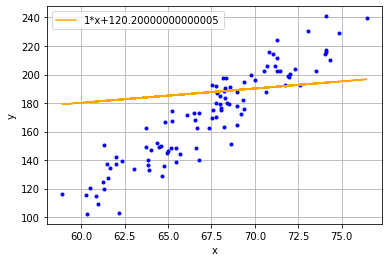

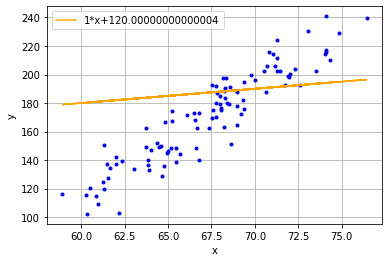

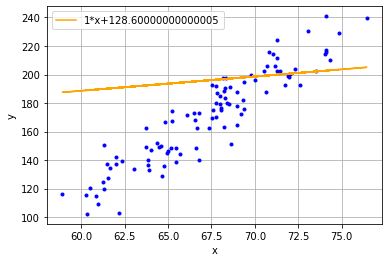

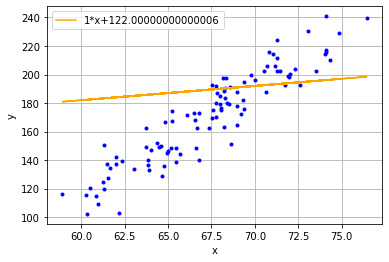

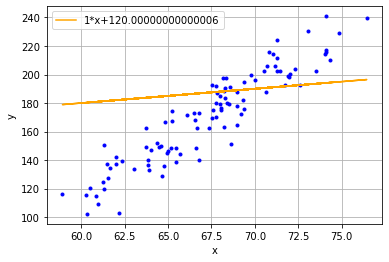

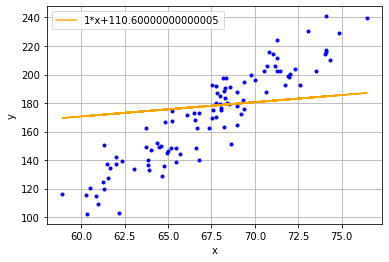

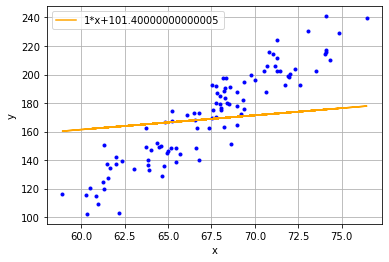

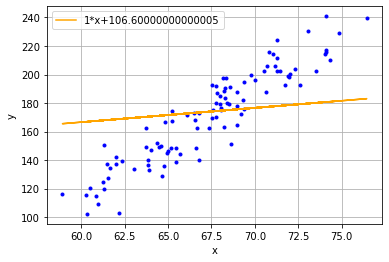

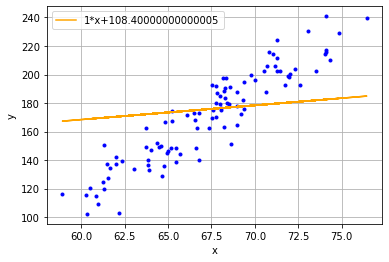

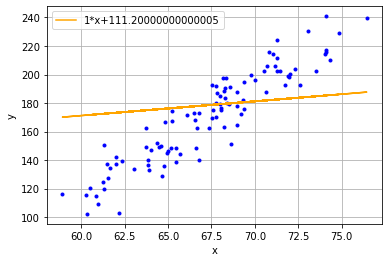

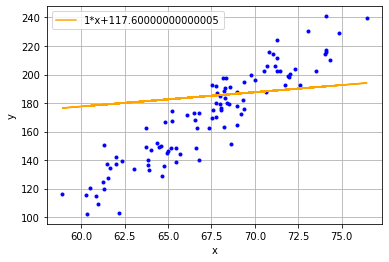

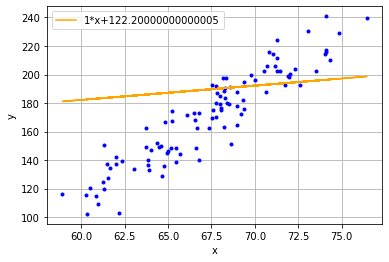

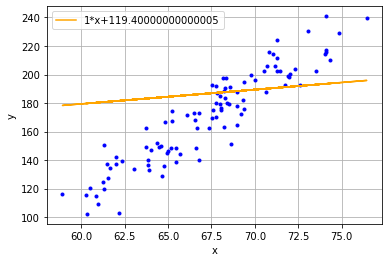

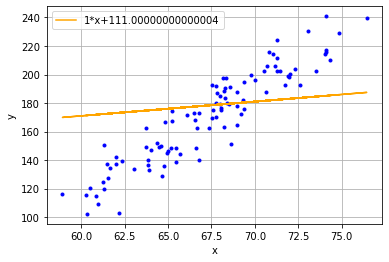

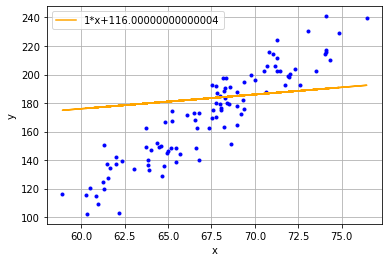

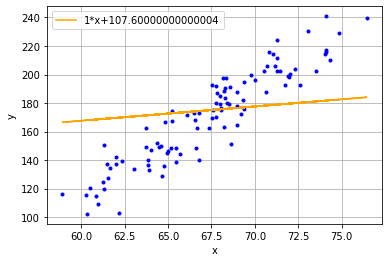

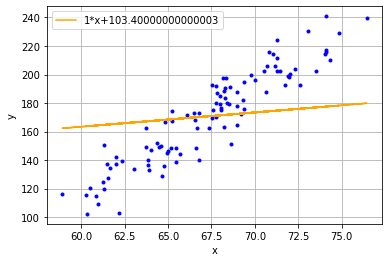

In [113]:
gradient_descent_wtih_b(small_data, 1, 0, 0.1)